### 피마 당뇨병 데이터

In [1]:
library(tidyverse)
library(data.table)
library(gridExtra)
library(ggplot2)
library(RColorBrewer)
library(gridExtra)

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.2     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [73]:
data<-fread("diabetes.csv")

# 기술통계량 Outline 및 간단한 전처리

데이터에 있는 모든 개체들은 여자들임

In [74]:
head(data)

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
5,116,74,0,0,25.6,0.201,30,0


In [75]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

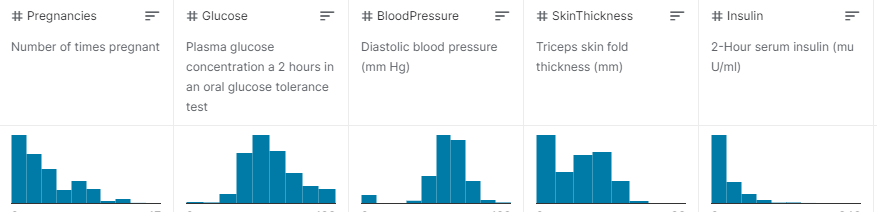

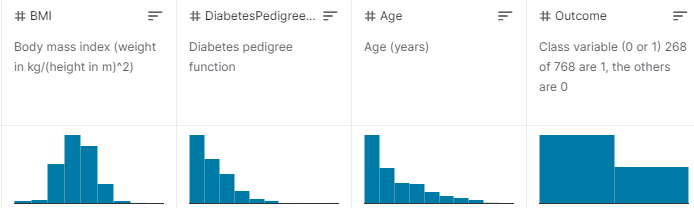

In [ ]:
# 나이 그룹별로 통게량 확인을 위해 나이 열 추가
data[,AgeGroup := Age %/% 10]

In [77]:
#고령자들 데이터 3개 제거.
data <- data[AgeGroup<7]

In [121]:
scatter_d <- function(df, col1, col2, ...) {
    graph <- ggplot(df, aes(x = get(col1), y = get(col2))) + 
    geom_point(shape = 20, size = 5, aes(colour = factor(get(...)))) + 
    ggtitle(paste("Scatter Plot :",col1,"between",col2)) + 
    labs(colour = paste(...), x = col1, y = col2)
    
    graph + scale_fill_brewer(palette = "Set1")
    return(graph)
}

In [115]:
Boxplot <- function(df, col1) {
    graph <- ggplot(df, aes(x = 1, y = get(col1))) +
    geom_boxplot() +
    ggtitle(paste("Boxplot of",col1)) + 
    labs(x = "value", y = col1)
    
    return(graph)
}

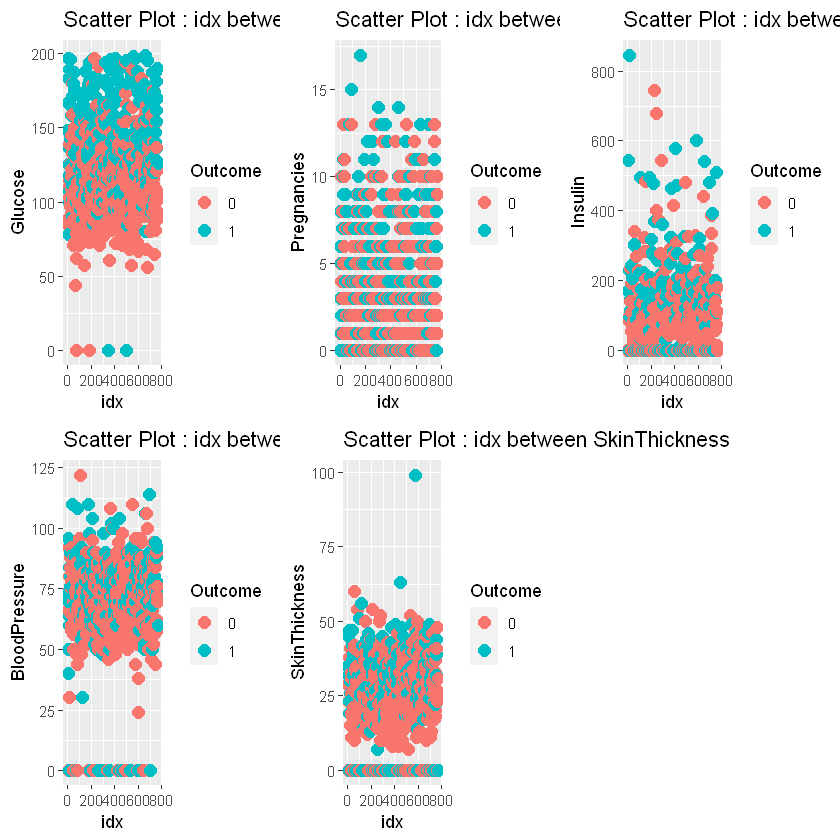

In [111]:
sca_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  sca_graph_list[[i]] = scatter_d(data, "idx", cols[i], "Outcome")
}

do.call("grid.arrange", c(sca_graph_list, ncol = 3, nrow = 2))

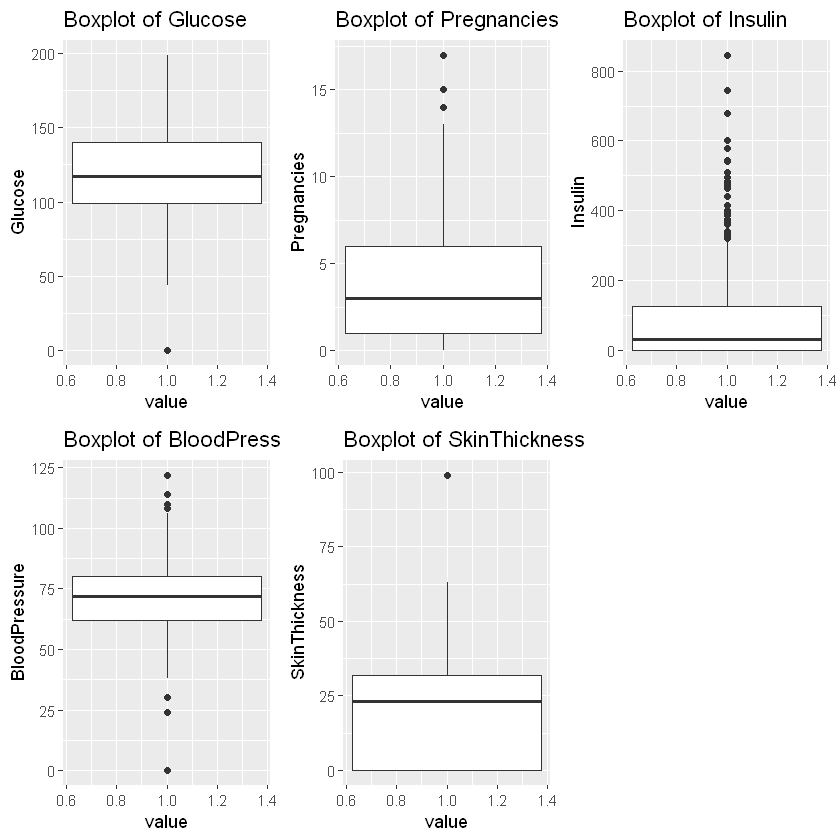

In [118]:
box_graph_list <- list()
cols <- c("Glucose", "Pregnancies", "Insulin", "BloodPressure",
         "SkinThickness")

for (i in 1:length(cols)){
  box_graph_list[[i]] = Boxplot(data, cols[i])
}

do.call("grid.arrange", c(box_graph_list, ncol = 3, nrow = 2))

# 혈압 및 BMI 변수 처리

혈압의 연령별 평균이 다르고,   
2~40대의 경우 혈압의 결측값이 많기 때문에,    
혈압 결측값 연령별 혈압 중위수로 대체    
why 중위수? 평균과 그렇게 차이 안나고 깔끔한 값  

In [78]:
data[BloodPressure!=0,mean(BloodPressure),AgeGroup][order(AgeGroup)]
data[BloodPressure!=0,median(BloodPressure),AgeGroup][order(AgeGroup)]

AgeGroup,V1
<dbl>,<dbl>
2,68.82447
3,73.68590
4,77.21239
5,79.80702
6,78.27586


AgeGroup,V1
<dbl>,<dbl>
2,68
3,74
4,78
5,78
6,78


In [81]:
data[BloodPressure == 0 & AgeGroup == 2, BloodPressure := 68]
data[BloodPressure == 0 & AgeGroup == 3, BloodPressure := 74]
data[BloodPressure == 0 & AgeGroup == 4, BloodPressure := 78]

BMI 0으로 나온 값들 다 연령별 평균으로 대체    
정규분포모양으로 생겨서 평균으로 대체하였음

In [39]:
data[BMI != 0, mean(BMI), AgeGroup][order(AgeGroup)]
data[BMI != 0, median(BMI), AgeGroup][order(AgeGroup)]

AgeGroup,V1
<dbl>,<dbl>
2,32.03763
3,32.67012
4,34.61780
5,31.89821
6,29.73571


AgeGroup,V1
<dbl>,<dbl>
2,31.60
3,32.00
4,33.95
5,33.05
6,29.30


In [84]:
data[BMI==0 & AgeGroup == 2, BMI:=32.04]
data[BMI==0 & AgeGroup == 3, BMI:=32.67]
data[BMI==0 & AgeGroup == 5, BMI:=31.90]
data[BMI==0 & AgeGroup == 6, BMI:=29.74]

In [86]:
# BMI 그룹별로 나누는 변수 추가
data[,BMI_cat := ifelse(BMI < 18.5,"uw",ifelse(BMI<25,"nm",ifelse(BMI<30,"ow","ob")))]
# row index 추가
data[, idx := seq(1,764)]

# Glucose 결측값 처리

In [120]:
data[Glucose == 0]

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat,idx
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>,<int>


In [119]:
data[Glucose == 0 & BloodPressure == 48, Glucose:=98]
data[Glucose == 0 & BloodPressure == 74, Glucose:=89]
data[Glucose == 0 & BMI == 32.0, Glucose:=109]
data[Glucose == 0 & BMI == 39, Glucose:=158]
data[Glucose == 0 & BloodPressure == 80, Glucose:=140]

글루코오스 같은 경우, 결측치가 5개 행밖에 없기 때문에  
가장 결측 행과 비슷한 행의 값들을 찾아 단일일 땐 그 값을 적고  
그 외에는 평균을 하고, 반올림 처리 하여 결측을 채웠다.   

추가적으로 알아낸 사실은 인슐린과 글루코오스간 관계가 있어보여서 히스토그램을 그려볼 것이다.  
만일 관계가 있다면 Insulin의 많은 결측값도 채워볼 수 있지 않을까 싶다.  

# Insulin 변수 처리 .. 난관..

일단 변수에 0이 너무 많아서 분명 결측치도 있을 것이라고 생각하지만   
일단 스킵한다.  

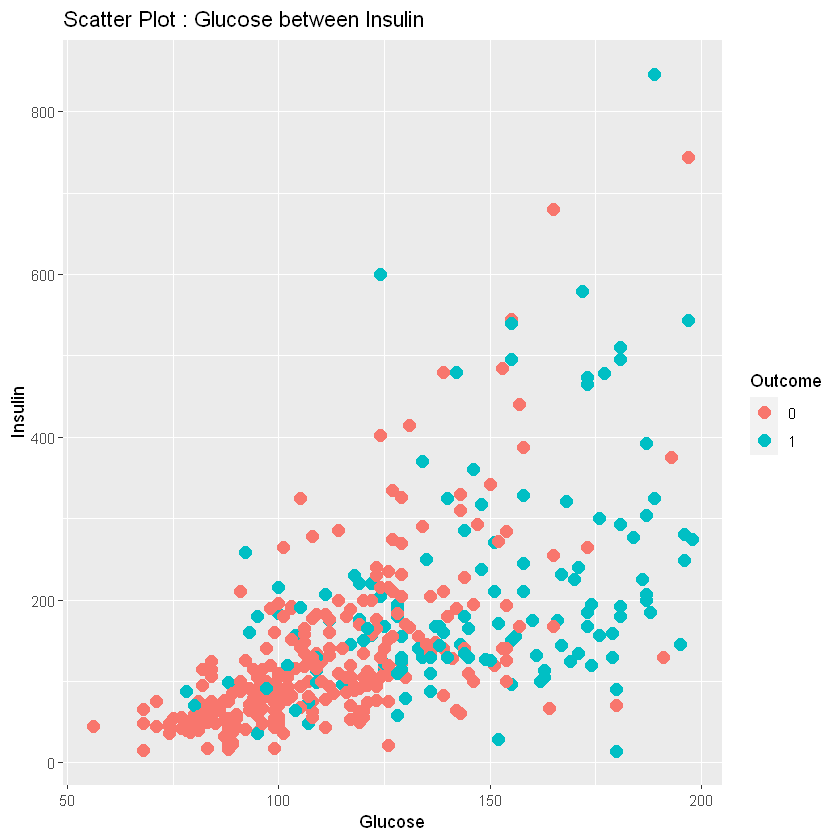

In [125]:
scatter_d(data[Insulin != 0], "Glucose", "Insulin", "Outcome")

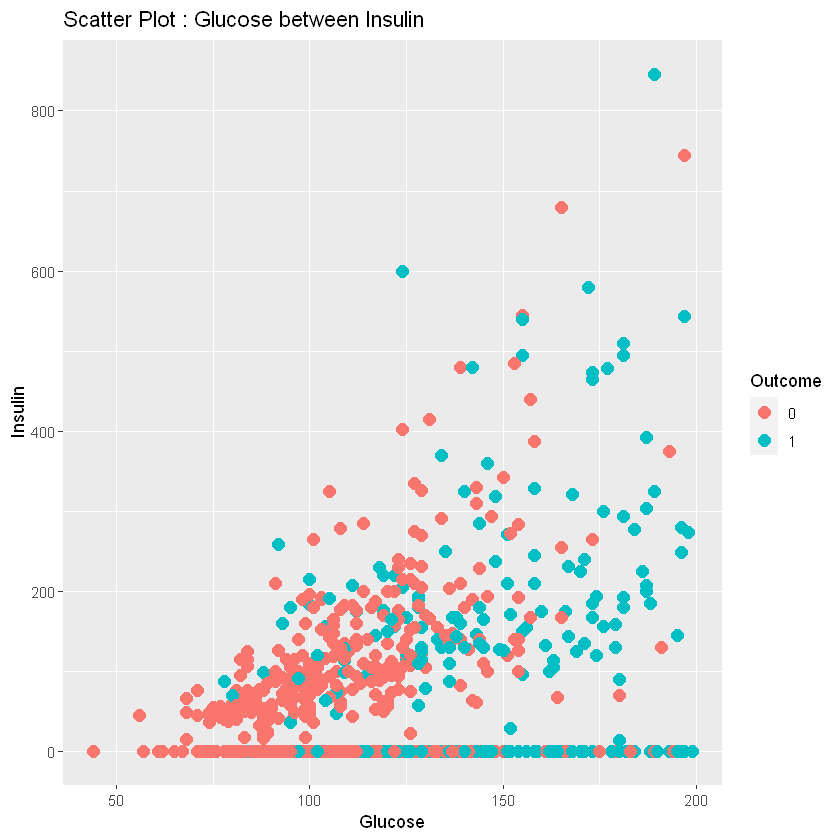

In [139]:
scatter_d(data, "Glucose", "Insulin", "Outcome")

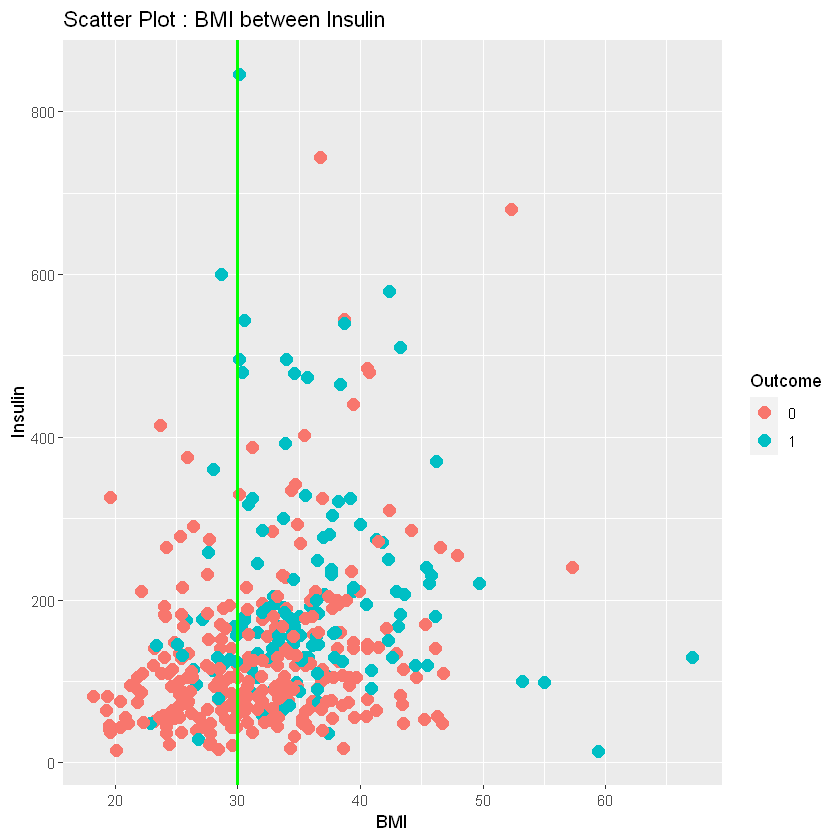

In [131]:
scatter_d(data[Insulin != 0], "BMI", "Insulin", "Outcome") + geom_vline(xintercept = 30, col = "green", size = 1)

인슐린의 정상 수치 범위는 공복 시 5\~15이며, 인슐린 저항성이   
있는 경우 15\~40

# SkinThickness 변수 처리

이런 경우는 BMI수치에 따라 SkinThickness가 관계를 가지므로,   
회귀분석을 실행하여 SkinThickness값을 채워주도록 하겠음..!!  

In [165]:
rline <- lm(data[SkinThickness!=0,SkinThickness]~data[SkinThickness!=0,BMI])

In [166]:
rline


Call:
lm(formula = data[SkinThickness != 0, SkinThickness] ~ data[SkinThickness != 
    0, BMI])

Coefficients:
                  (Intercept)  data[SkinThickness != 0, BMI]  
                      -3.4650                         0.9878  


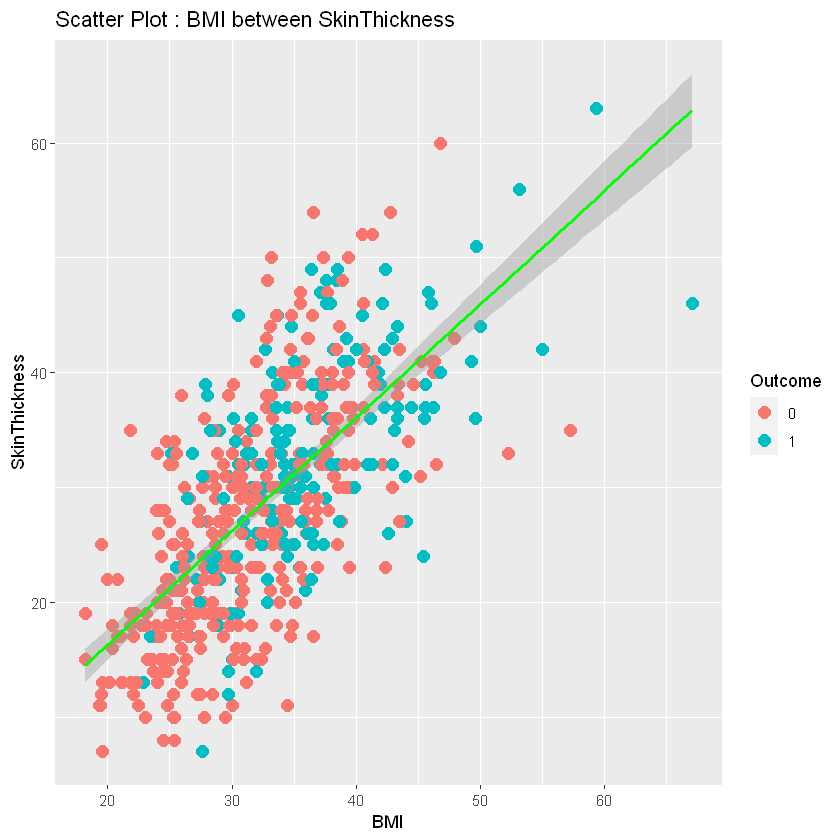

In [167]:
scatter_d(data[SkinThickness!=0], "BMI", "SkinThickness", "Outcome") +
    geom_smooth(method = 'lm', formula = y~x, color = "green")

In [162]:
# 아웃라이어 제거
data <- data[idx != 578]

In [171]:
# StickThickness 값 채우기
data[SkinThickness == 0 , SkinThickness := round(-3.4650 + 0.9878*BMI)]

# 대망의 미스터페데그린 변수;;

In [8]:
# 연령별 당뇨병 비율
data[Outcome == 1,.N,by = AgeGroup][order(AgeGroup)][,2] / data[AgeGroup != 8][,.N,AgeGroup][order(AgeGroup)][,2]
data[AgeGroup != 8][,.N,AgeGroup][order(AgeGroup)]

N
<dbl>
0.2121212
0.4606061
0.5508475
0.5964912
0.2758621
0.5000000


AgeGroup,N
<dbl>,<int>
2,396
3,165
4,118
5,57
6,29
7,2


20대와 60대의 당뇨 비율 낮고 30대와 50대 사이  
당뇨 비율이 높음

In [9]:
# BMI별 당뇨병 비율
data[Outcome == 1, .N, by = BMI_cat][order(BMI_cat)][,2] / data[,.N,by = BMI_cat][order(BMI_cat)][,2]
data[, .N, by = BMI_cat][order(BMI_cat)]

N
<dbl>
0.06862745
0.46398305
0.22346369
0.13333333


BMI_cat,N
<chr>,<int>
nm,102
ob,472
ow,179
uw,15


전반적으로 무게가 많이 나가는 사람이 많이 조사되었고,   
피마 인디언은 무게가 많이 나가는 사람이 많은가 보다.  
비만 --> 과체중 --> 저체중 --> 정상 순으로   
당뇨병 비율이 높았음.

In [10]:
#나이별 인슐린 수치 평균
data[,.(.N, mean_ins = mean(Insulin)),AgeGroup][order(AgeGroup)]

AgeGroup,N,mean_ins
<dbl>,<int>,<dbl>
2,396,84.39394
3,165,77.81212
4,118,63.89831
5,57,109.40351
6,29,41.06897
7,2,0.00000
8,1,60.00000


20대 400명 30대 165명 40대 118명 5060대 : 86명 7080대 : 3명   

In [ ]:
for (i in 1:length(category_wp)){
  wp_graph_list[[i]] = draw_bargraph(bf_wp, af_wp, category_wp[i])
}

# 학습 모델 RF, SVM, XGBoost, LGBM 